In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r'C:\Users\useme\Desktop\Final Project-DSA\Final_AQI_Dataset_edited.csv')

In [3]:
data.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01 00:00:00,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02 00:00:00,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03 00:00:00,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04 00:00:00,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05 00:00:00,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [4]:
data.shape

(53035, 16)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53035 entries, 0 to 53034
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        53035 non-null  object 
 1   Date        53035 non-null  object 
 2   PM2.5       48437 non-null  float64
 3   PM10        41895 non-null  float64
 4   NO          49453 non-null  float64
 5   NO2         49450 non-null  float64
 6   NOx         48850 non-null  float64
 7   NH3         42707 non-null  float64
 8   CO          50976 non-null  float64
 9   SO2         49181 non-null  float64
 10  O3          49013 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         48354 non-null  float64
 15  AQI_Bucket  48354 non-null  object 
dtypes: float64(13), object(3)
memory usage: 6.5+ MB


In [6]:
data.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,48437.000000,41895.000000,49453.000000,49450.000000,48850.000000,42707.000000,50976.000000,49181.000000,49013.000000,23908.000000,21490.000000,11422.000000,48354.000000
mean,82.564980,120.214657,12.076130,26.889211,21.569142,17.196628,514.497080,15.219913,34.763979,3.280840,8.700972,3.070128,143.045951
std,106.363257,134.335806,24.313599,25.193568,27.177018,22.322929,1101.231991,21.122710,27.075303,15.811136,19.969164,6.323247,116.676373
min,0.040000,0.010000,0.000000,0.010000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,3.883333
25%,27.310000,43.640000,0.000000,10.340000,4.562767,4.185000,0.840000,5.110000,15.230000,0.120000,0.600000,0.140000,69.000000
50%,52.380000,85.650000,4.450000,19.150000,12.510000,10.750000,3.590000,8.690000,29.940000,1.070000,2.970000,0.980000,111.000000
75%,96.190000,148.720000,12.850000,35.300000,27.640275,22.400000,654.220000,15.740000,48.640000,3.080000,9.150000,3.350000,196.108333
max,2203.550000,2429.130000,457.760000,362.210000,467.630000,352.890000,23071.290000,442.510000,406.270000,455.030000,454.850000,170.370000,2049.000000


In [7]:
data.drop(['Benzene','Toluene','Xylene'],axis=1,inplace=True)

In [8]:
missing_values = data.isna().sum().sort_values(ascending=False)
print(missing_values)

PM10          11140
NH3           10328
AQI            4681
AQI_Bucket     4681
PM2.5          4598
NOx            4185
O3             4022
SO2            3854
NO2            3585
NO             3582
CO             2059
City              0
Date              0
dtype: int64


In [9]:
#Calculate the percent of null values for each features (sum of null values / total non-null value) *100

percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending=False)  #count(returns Non-NAN value)
missing_data = pd.concat([missing_values, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data)

            Total    Percent
PM10        11140  21.004997
NH3         10328  19.473932
AQI          4681   8.826247
AQI_Bucket   4681   8.826247
PM2.5        4598   8.669746
NOx          4185   7.891015
O3           4022   7.583671
SO2          3854   7.266899
NO2          3585   6.759687
NO           3582   6.754030
CO           2059   3.882342
City            0   0.000000
Date            0   0.000000


# Handling missing values

In [10]:
# Get a list of columns to fill null values in (exclude 'AQI_Bucket' and 'AQI')
columns_to_fill = data.columns.difference(['AQI_Bucket','AQI'])

# Fill null values in the selected columns for each city separately
data[columns_to_fill] = data.groupby('City')[columns_to_fill].apply(lambda group: group.fillna(method='ffill').fillna(method='bfill'))

data.head(10)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01 00:00:00,73.24,141.54,0.92,18.22,17.15,8.36,0.92,27.64,133.36,NaN,NaN
1,Ahmedabad,2015-01-02 00:00:00,73.24,141.54,0.97,15.69,16.46,8.36,0.97,24.55,34.06,NaN,NaN
2,Ahmedabad,2015-01-03 00:00:00,73.24,141.54,17.40,19.30,29.70,8.36,17.40,29.07,30.70,NaN,NaN
3,Ahmedabad,2015-01-04 00:00:00,73.24,141.54,1.70,18.48,17.97,8.36,1.70,18.59,36.08,NaN,NaN
4,Ahmedabad,2015-01-05 00:00:00,73.24,141.54,22.10,21.42,37.76,8.36,22.10,39.33,39.31,NaN,NaN
5,Ahmedabad,2015-01-06 00:00:00,73.24,141.54,45.41,38.48,81.50,8.36,45.41,45.76,46.51,NaN,NaN
6,Ahmedabad,2015-01-07 00:00:00,73.24,141.54,112.16,40.62,130.77,8.36,112.16,32.28,33.47,NaN,NaN
7,Ahmedabad,2015-01-08 00:00:00,73.24,141.54,80.87,36.74,96.75,8.36,80.87,38.54,31.89,NaN,NaN
8,Ahmedabad,2015-01-09 00:00:00,73.24,141.54,29.16,31.00,48.00,8.36,29.16,58.68,25.75,NaN,NaN
9,Ahmedabad,2015-01-10 00:00:00,73.24,141.54,29.16,7.04,0.00,8.36,29.16,8.29,4.55,NaN,NaN


In [11]:
ind1 = data["AQI"].isna()
missing_indices = data.loc[ind1].index.tolist()

print("Indices of rows with missing values in 'AQI' column:", missing_indices)

Indices of rows with missing values in 'AQI' column: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 56, 57, 58, 59, 64, 65, 94, 99, 112, 116, 117, 140, 201, 251, 262, 263, 293, 299, 304, 305, 307, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 46

In [12]:
data.drop([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 56, 57, 58, 59, 64, 65, 94, 99, 112, 116, 117, 140, 201, 251, 262, 263, 293, 299, 304, 305, 307, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 553, 554, 555, 556, 557, 558, 559, 583, 584, 627, 628, 629, 643, 674, 675, 676, 677, 678, 679, 680, 681, 682, 683, 684, 685, 686, 687, 688, 689, 690, 691, 692, 693, 694, 695, 696, 697, 698, 699, 700, 701, 702, 703, 704, 705, 706, 707, 708, 709, 710, 711, 712, 713, 714, 715, 716, 717, 718, 719, 720, 721, 722, 723, 724, 725, 726, 727, 728, 729, 730, 731, 732, 733, 734, 735, 736, 737, 738, 739, 740, 741, 742, 743, 744, 745, 746, 747, 748, 749, 750, 751, 752, 753, 754, 755, 756, 757, 758, 759, 760, 761, 762, 763, 764, 765, 766, 767, 768, 769, 770, 771, 772, 773, 774, 775, 776, 777, 778, 779, 780, 781, 782, 783, 784, 785, 786, 787, 788, 789, 790, 791, 792, 793, 794, 795, 796, 797, 798, 799, 800, 801, 802, 803, 804, 805, 806, 807, 808, 809, 810, 811, 812, 813, 814, 815, 816, 817, 818, 819, 820, 821, 822, 823, 824, 825, 826, 827, 828, 829, 830, 831, 832, 833, 834, 835, 836, 837, 838, 839, 840, 841, 842, 843, 844, 845, 846, 847, 848, 849, 850, 851, 852, 853, 854, 855, 856, 857, 858, 859, 860, 861, 862, 863, 864, 865, 866, 867, 868, 869, 870, 871, 872, 873, 874, 875, 876, 877, 878, 879, 880, 881, 882, 883, 884, 885, 886, 887, 888, 889, 890, 891, 892, 893, 894, 895, 896, 897, 898, 899, 900, 901, 902, 903, 904, 905, 906, 907, 908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920, 921, 922, 923, 924, 925, 926, 927, 928, 929, 930, 931, 932, 933, 934, 935, 936, 937, 938, 939, 940, 941, 942, 943, 944, 945, 946, 947, 948, 949, 950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 960, 961, 962, 963, 964, 965, 966, 967, 968, 969, 970, 971, 972, 973, 974, 975, 976, 977, 978, 979, 980, 981, 982, 983, 984, 985, 986, 987, 988, 989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999, 1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012, 1013, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023, 1033, 1034, 1035, 1036, 1115, 1150, 1151, 1245, 1246, 1341, 1342, 1343, 1575, 1576, 1577, 1590, 1591, 1592, 1593, 1594, 1672, 1714, 1715, 1716, 1747, 1849, 1850, 1851, 1852, 1905, 1980, 1995, 2009, 2101, 2122, 2239, 2255, 2260, 2261, 2267, 2269, 2272, 2273, 2275, 2279, 2284, 2285, 2286, 2287, 2289, 2291, 2295, 2298, 2300, 2302, 2363, 2377, 2391, 2394, 2412, 2418, 2419, 2430, 2435, 2436, 2440, 2443, 2450, 2451, 2452, 2453, 2454, 2457, 2464, 2465, 2471, 2478, 2479, 2485, 2486, 2487, 2488, 2492, 2493, 2499, 2506, 2513, 2520, 2656, 2657, 2658, 2666, 2729, 2730, 2749, 2750, 2754, 2755, 2756, 2757, 2758, 2759, 2760, 2761, 2762, 2763, 2767, 2768, 2769, 2770, 2771, 2772, 2773, 2774, 2775, 2776, 2777, 2778, 2779, 2780, 2781, 2782, 2783, 2784, 2785, 2786, 2787, 2788, 2789, 2790, 2791, 2792, 2793, 2794, 2795, 2796, 2797, 2798, 2799, 2800, 2801, 2802, 2803, 2804, 3073, 3112, 3113, 3126, 3127, 3128, 3129, 3145, 3168, 3179, 3205, 3206, 3223, 3224, 3225, 3230, 3231, 3232, 3233, 3234, 3235, 3236, 3237, 3290, 3291, 3292, 3293, 3294, 3295, 3296, 3297, 3298, 3299, 3300, 3301, 3302, 3303, 3304, 3305, 3306, 3307, 3355, 3385, 3386, 3387, 3388, 3389, 3390, 3391, 3392, 3437, 3462, 3463, 3464, 3465, 3466, 3467, 3468, 3469, 3470, 3471, 3472, 3473, 3474, 3475, 3538, 3543, 3575, 3576, 3580, 3588, 3607, 3608, 3609, 3614, 3617, 3618, 3619, 3620, 3625, 3626, 3689, 3699, 3769, 3809, 3983, 4143, 4144, 4182, 4207, 4208, 4209, 4210, 4211, 4212, 4294, 4295, 4296, 4297, 4298, 4299, 4300, 4301, 4302, 4303, 4304, 4305, 4306, 4307, 4308, 4309, 4310, 4311, 4312, 4313, 4314, 4315, 4316, 4317, 4318, 4319, 4320, 4321, 4322, 4323, 4324, 4325, 4326, 4327, 4328, 4329, 4330, 4331, 4332, 4333, 4334, 4335, 4336, 4337, 4338, 4339, 4340, 4341, 4342, 4343, 4344, 4345, 4346, 4347, 4348, 4349, 4350, 4351, 4352, 4353, 4354, 4355, 4356, 4357, 4358, 4359, 4360, 4361, 4362, 4363, 4364, 4365, 4366, 4367, 4368, 4369, 4370, 4371, 4372, 4819, 4836, 4860, 4861, 4862, 4864, 4865, 4866, 4876, 4877, 4878, 4879, 4880, 4881, 4882, 5212, 5476, 5477, 5489, 5490, 6303, 6497, 6498, 6499, 6500, 6501, 6502, 6503, 6504, 6505, 6506, 6592, 6596, 6597, 6605, 6606, 6607, 6608, 6609, 6610, 6611, 6612, 6613, 6614, 6615, 6616, 6617, 6618, 6619, 6620, 6621, 6622, 6623, 6624, 6625, 6626, 6627, 6628, 6629, 6630, 6631, 6632, 6633, 6634, 6635, 6636, 6637, 6638, 6639, 6640, 6641, 6642, 6643, 6644, 6645, 6646, 6647, 6648, 6736, 6768, 6769, 6770, 6771, 6859, 6860, 6861, 6862, 6863, 6864, 6865, 6866, 6867, 6868, 6869, 6870, 6871, 6872, 6873, 6874, 6875, 6876, 6877, 6878, 6879, 6880, 6881, 6882, 6883, 6884, 6885, 6886, 6887, 6888, 6889, 6890, 6891, 6892, 6893, 6894, 6895, 6896, 6897, 6898, 6899, 6900, 6901, 6902, 6903, 6904, 6905, 6906, 6936, 6937, 6938, 6939, 6940, 6941, 6942, 6943, 6944, 6945, 6946, 6947, 6948, 6949, 6950, 6951, 6952, 6953, 6954, 6955, 7030, 7077, 7078, 7079, 7080, 7081, 7082, 7087, 7088, 7089, 7090, 7092, 7093, 7094, 7095, 7104, 7107, 7131, 7133, 7135, 7143, 7145, 7163, 7167, 7172, 7198, 7199, 7201, 7202, 7203, 7204, 7205, 7206, 7207, 7212, 7213, 7216, 7282, 7283, 7284, 7285, 7310, 7313, 7357, 7358, 7359, 7360, 7380, 7401, 7417, 7418, 7419, 7420, 7421, 7422, 7423, 7427, 7428, 7429, 7430, 7444, 7445, 7446, 7462, 7478, 7479, 7480, 7485, 7486, 7487, 7488, 7489, 7490, 7491, 7492, 7493, 7494, 7495, 7496, 7497, 7499, 7502, 7504, 7505, 7506, 7508, 7511, 7512, 7513, 7514, 7515, 7516, 7517, 7518, 7519, 7520, 7521, 7522, 7523, 7524, 7525, 7526, 7527, 7528, 7529, 7530, 7534, 7537, 7558, 7758, 7834, 7835, 7836, 7837, 7838, 7839, 7840, 7841, 7842, 7843, 7844, 7845, 7846, 7847, 7848, 7849, 7850, 7851, 7852, 7853, 7854, 7855, 7856, 7857, 7858, 7859, 7860, 7861, 7862, 7863, 7864, 7865, 7866, 7867, 7868, 7869, 7870, 7871, 7872, 7873, 7874, 7875, 7876, 7877, 7878, 7879, 7880, 7881, 7882, 7883, 7884, 7885, 7886, 7887, 7888, 7889, 7890, 7891, 7892, 7893, 7894, 7895, 7896, 7897, 7898, 7899, 7900, 7901, 7902, 7903, 7904, 7905, 7906, 7907, 7908, 7909, 7910, 7911, 7912, 7913, 7914, 7915, 7917, 7921, 7922, 7927, 8172, 8173, 8174, 8354, 8355, 8356, 8357, 8358, 8359, 8360, 8361, 8362, 8363, 8364, 8376, 8377, 8402, 8475, 8547, 8548, 8549, 8550, 8551, 8552, 8553, 8554, 8555, 8556, 8557, 8558, 8559, 8560, 8561, 8562, 8563, 8745, 8795, 8796, 8797, 9843, 9852, 9879, 9880, 9881, 9899, 9920, 9921, 9922, 9923, 9934, 9973, 9981, 10002, 10036, 10069, 10097, 10111, 10127, 10128, 10131, 10132, 10133, 10134, 10135, 10136, 10137, 10138, 10139, 10140, 10144, 10145, 10146, 10147, 10150, 10151, 10164, 10165, 10166, 10179, 10188, 10228, 10799, 11133, 11184, 11185, 11193, 11194, 11197, 11198, 11199, 11200, 12238, 12239, 12240, 12287, 12289, 12306, 12385, 12386, 12387, 12400, 12401, 12402, 12403, 12404, 12405, 12406, 12407, 12408, 12409, 12410, 12411, 12412, 12413, 12414, 12415, 12416, 12417, 12418, 12419, 12420, 12421, 12422, 12423, 12424, 12425, 12426, 12427, 12428, 12429, 12430, 12431, 12432, 12433, 12434, 12435, 12436, 12437, 12438, 12439, 12440, 12441, 12442, 12443, 12444, 12445, 12446, 12447, 12448, 12449, 12450, 12451, 12452, 12453, 12454, 12455, 12456, 12459, 12461, 12462, 12463, 12464, 12465, 12466, 12467, 12471, 12472, 12473, 12474, 12475, 12476, 12477, 12478, 12479, 12480, 12481, 12482, 12483, 12485, 12486, 12487, 12488, 12499, 12500, 12501, 12505, 12506, 12507, 12508, 12509, 12510, 12511, 12512, 12513, 12514, 12515, 12516, 12517, 12518, 12519, 12520, 12527, 12528, 12529, 12530, 12531, 12532, 12533, 12552, 12553, 12592, 12593, 12601, 12608, 12609, 12610, 12611, 12612, 12613, 12614, 12615, 12616, 12617, 12618, 12619, 12620, 12621, 12622, 12623, 12624, 12625, 12626, 12627, 12628, 12629, 12638, 12640, 12641, 12642, 12650, 12654, 12655, 12656, 12657, 12658, 12668, 12669, 12678, 12679, 12682, 12683, 12686, 12687, 12695, 12713, 12714, 12733, 12734, 12735, 12736, 12749, 12772, 12773, 12795, 12821, 12822, 12826, 12827, 12833, 12855, 12856, 12875, 12876, 12885, 12937, 12938, 12939, 12940, 12941, 12942, 12943, 12945, 12955, 12956, 12991, 12996, 12997, 12998, 13005, 13006, 13007, 13012, 13019, 13020, 13021, 13040, 13041, 13079, 13081, 13152, 13216, 13217, 13218, 13219, 13220, 13221, 13222, 13223, 13224, 13273, 13274, 13275, 13276, 13282, 13283, 13284, 13285, 13300, 13410, 13411, 13412, 13423, 13424, 13425, 13429, 13700, 14079, 14088, 14156, 14157, 14222, 14223, 14321, 14581, 14582, 14583, 14584, 14585, 14586, 14587, 14588, 14589, 14590, 14591, 14592, 14593, 14594, 14595, 14596, 14597, 14598, 14599, 14600, 14601, 14602, 14603, 14604, 14605, 14606, 14607, 14608, 14609, 14610, 14611, 14612, 14613, 14614, 14615, 14616, 14617, 14618, 14619, 14620, 14621, 14622, 14623, 14624, 14625, 14626, 14627, 14628, 14629, 14630, 14631, 14632, 14633, 14634, 14635, 14636, 14637, 14638, 14639, 14640, 14641, 14642, 14643, 14644, 14645, 14646, 14647, 14648, 14649, 14650, 14651, 14652, 14653, 14654, 14655, 14656, 14657, 14658, 14659, 14660, 14661, 14662, 14663, 14664, 14665, 14666, 14669, 14670, 14671, 14672, 15058, 15168, 15169, 15170, 15171, 15172, 15173, 15174, 15175, 15176, 15177, 15178, 15179, 15180, 15181, 15182, 15183, 15184, 15185, 15186, 15187, 15191, 15195, 15203, 15204, 15205, 15210, 15226, 15227, 15352, 15583, 15597, 15606, 15607, 15608, 15609, 16587, 16588, 16589, 16590, 16591, 16592, 16622, 16626, 16627, 16628, 16633, 16634, 16636, 16652, 16653, 16654, 16655, 16663, 16691, 16701, 17701, 17713, 17767, 17768, 17769, 17770, 17771, 17772, 17773, 17774, 17775, 17776, 17777, 17778, 17779, 17780, 17781, 17782, 17783, 17784, 17785, 17786, 17787, 17788, 17789, 17790, 17791, 17794, 17795, 17799, 17800, 17801, 17802, 17803, 17804, 17806, 17807, 17808, 17809, 17810, 17811, 17812, 17813, 17814, 17815, 17816, 17817, 17818, 17819, 17822, 17823, 17824, 17825, 17826, 17827, 17828, 17829, 17830, 17831, 17832, 17833, 17834, 17835, 17836, 17837, 17838, 17839, 17840, 17841, 17842, 17843, 17844, 17845, 17846, 17847, 17848, 17849, 17850, 17851, 17852, 17853, 17854, 17855, 17856, 17857, 17858, 17859, 17860, 17861, 17862, 17863, 17864, 17865, 17866, 17867, 17868, 17869, 17870, 17871, 17872, 17873, 17874, 17875, 17876, 17877, 17878, 17879, 17880, 17881, 17882, 17883, 17884, 17885, 17886, 17887, 17888, 17889, 17890, 17891, 17892, 17893, 17894, 17895, 17896, 17897, 17898, 17899, 17900, 17901, 17902, 17903, 17904, 17905, 17906, 17907, 17908, 17909, 17910, 17911, 17912, 17913, 17914, 17915, 17916, 17917, 17918, 17919, 17920, 17921, 17922, 17923, 17924, 17925, 17926, 17927, 17928, 17929, 17930, 17931, 17932, 17933, 17934, 17935, 17936, 17937, 17938, 17939, 17940, 17941, 17942, 17943, 17944, 17945, 17950, 17951, 17957, 17958, 17962, 17963, 17964, 17965, 17966, 17999, 18005, 18006, 18041, 18042, 18043, 18044, 18045, 18046, 18047, 18048, 18049, 18050, 18051, 18052, 18053, 18054, 18055, 18056, 18057, 18058, 18060, 18061, 18062, 18063, 18064, 18065, 18068, 18069, 18072, 18073, 18074, 18075, 18076, 18077, 18078, 18079, 18080, 18081, 18082, 18083, 18084, 18085, 18086, 18087, 18088, 18089, 18090, 18091, 18092, 18093, 18094, 18095, 18096, 18097, 18098, 18099, 18100, 18101, 18102, 18103, 18104, 18105, 18106, 18107, 18108, 18109, 18117, 18118, 18119, 18120, 18121, 18122, 18123, 18124, 18125, 18126, 18127, 18128, 18129, 18130, 18131, 18132, 18133, 18134, 18135, 18136, 18137, 18138, 18139, 18140, 18167, 18208, 18209, 18210, 18211, 18212, 18213, 18214, 18215, 18216, 18217, 18218, 18219, 18220, 18221, 18222, 18223, 18224, 18225, 18226, 18227, 18228, 18229, 18230, 18231, 18232, 18237, 18245, 18277, 18278, 18279, 18280, 18295, 18296, 18297, 18298, 18299, 18300, 18313, 18314, 18315, 18316, 18410, 18411, 18412, 18456, 18458, 18467, 18468, 18473, 18474, 18475, 18476, 18477, 18478, 18479, 18480, 18481, 18482, 18483, 18484, 18485, 18486, 18487, 18488, 18489, 18490, 18491, 18492, 18493, 18494, 18495, 18496, 18497, 18498, 18499, 18500, 18501, 18502, 18503, 18504, 18505, 18506, 18507, 18508, 18509, 18510, 18511, 18512, 18513, 18514, 18583, 18584, 18585, 18586, 18587, 18596, 18597, 18608, 18609, 18610, 18611, 18647, 18648, 18726, 18727, 18753, 18754, 18755, 18756, 18757, 18758, 18759, 18760, 18761, 18762, 18768, 18769, 18770, 18771, 18772, 18773, 18774, 18775, 18776, 18870, 18914, 18975, 18976, 19032, 19040, 19041, 19042, 19043, 19044, 19045, 19046, 19047, 19048, 19049, 19050, 19051, 19052, 19053, 19054, 19055, 19056, 19057, 19058, 19059, 19060, 19061, 19062, 19063, 19064, 19065, 19066, 19067, 19068, 19069, 19070, 19071, 19072, 19073, 19074, 19075, 19076, 19077, 19078, 19079, 19080, 19081, 19082, 19083, 19084, 19085, 19086, 19087, 19088, 19089, 19090, 19091, 19092, 19093, 19094, 19095, 19096, 19097, 19098, 19846, 19847, 19848, 19849, 19850, 19851, 19852, 19853, 19854, 19855, 19856, 19857, 19858, 19859, 19860, 19861, 19862, 19863, 19864, 19865, 19866, 19867, 19868, 19869, 19870, 19871, 19872, 19873, 19874, 19875, 19876, 19877, 19878, 19879, 19880, 19881, 19882, 19883, 19884, 19885, 19886, 19887, 19888, 19889, 19890, 19891, 19892, 19893, 19894, 19895, 19896, 19897, 19898, 19899, 19900, 19901, 19902, 19903, 19904, 19905, 19906, 19907, 19908, 19909, 19910, 19911, 19912, 19913, 19914, 19915, 19916, 19917, 19918, 19919, 19920, 19921, 19922, 19923, 19924, 19953, 20039, 20341, 20342, 20343, 20344, 20345, 20346, 20347, 20348, 20349, 20350, 20351, 20352, 20353, 20354, 20355, 20356, 20357, 20366, 20370, 20371, 20388, 20389, 20397, 20414, 20416, 20419, 20424, 20430, 20431, 20432, 20433, 20434, 20741, 20742, 20743, 21855, 21856, 21857, 21858, 21859, 21860, 21861, 21862, 21863, 21864, 21865, 21866, 21867, 21868, 21869, 21870, 21871, 21872, 21873, 21874, 21875, 21876, 21877, 21878, 21879, 21880, 21881, 21882, 21883, 21884, 21885, 21886, 21887, 21888, 21889, 21890, 21891, 21892, 21893, 21894, 21895, 21896, 21897, 21898, 21899, 21900, 21901, 21902, 21903, 21904, 21905, 21906, 21907, 21908, 21909, 21910, 21911, 21912, 21913, 21914, 21915, 21916, 21917, 21918, 21919, 21920, 21921, 21922, 21923, 21924, 21925, 21926, 21927, 21928, 21929, 21930, 21931, 21932, 21933, 21934, 21935, 21936, 21937, 21938, 21939, 21940, 21941, 21942, 21943, 21944, 21945, 21946, 21947, 21948, 21949, 21950, 21951, 21952, 21953, 21954, 21955, 21956, 21957, 21958, 21959, 21960, 21961, 21962, 21963, 21964, 21965, 21966, 21967, 21968, 21969, 21970, 21971, 21972, 21973, 21974, 21975, 21976, 21977, 21978, 21979, 21980, 21981, 21982, 21983, 21984, 21985, 21986, 21987, 21988, 21989, 21990, 21991, 21992, 21993, 21994, 21995, 21996, 21997, 21998, 21999, 22000, 22001, 22002, 22003, 22004, 22005, 22006, 22007, 22008, 22009, 22010, 22011, 22012, 22013, 22014, 22015, 22016, 22017, 22018, 22019, 22020, 22021, 22022, 22023, 22024, 22025, 22026, 22027, 22028, 22029, 22030, 22031, 22032, 22033, 22034, 22035, 22036, 22037, 22038, 22039, 22040, 22041, 22042, 22043, 22044, 22045, 22046, 22047, 22048, 22049, 22050, 22051, 22052, 22053, 22054, 22055, 22056, 22057, 22058, 22059, 22060, 22061, 22062, 22063, 22064, 22065, 22066, 22067, 22068, 22069, 22070, 22071, 22072, 22073, 22074, 22075, 22076, 22077, 22078, 22079, 22080, 22081, 22082, 22083, 22084, 22085, 22086, 22087, 22088, 22089, 22090, 22091, 22092, 22093, 22094, 22095, 22096, 22097, 22098, 22099, 22100, 22101, 22102, 22103, 22104, 22105, 22106, 22107, 22108, 22109, 22110, 22111, 22112, 22113, 22114, 22115, 22116, 22117, 22118, 22119, 22120, 22121, 22122, 22123, 22124, 22125, 22126, 22127, 22128, 22129, 22130, 22131, 22132, 22133, 22134, 22135, 22136, 22137, 22138, 22139, 22140, 22141, 22142, 22143, 22144, 22145, 22146, 22147, 22148, 22149, 22150, 22151, 22152, 22153, 22154, 22155, 22156, 22157, 22158, 22159, 22160, 22161, 22162, 22163, 22164, 22165, 22166, 22167, 22168, 22169, 22170, 22171, 22172, 22173, 22174, 22175, 22176, 22177, 22178, 22179, 22180, 22181, 22182, 22183, 22184, 22185, 22186, 22187, 22188, 22189, 22190, 22191, 22192, 22193, 22194, 22195, 22196, 22197, 22198, 22199, 22200, 22201, 22202, 22203, 22204, 22205, 22206, 22207, 22208, 22209, 22210, 22211, 22212, 22213, 22214, 22215, 22216, 22217, 22218, 22219, 22220, 22221, 22222, 22223, 22224, 22225, 22226, 22227, 22228, 22229, 22230, 22231, 22232, 22233, 22234, 22235, 22236, 22237, 22238, 22239, 22240, 22241, 22242, 22243, 22244, 22245, 22246, 22247, 22248, 22249, 22250, 22251, 22252, 22253, 22254, 22255, 22256, 22257, 22258, 22259, 22260, 22261, 22262, 22263, 22264, 22265, 22266, 22267, 22268, 22269, 22270, 22271, 22272, 22273, 22274, 22275, 22276, 22277, 22278, 22279, 22280, 22281, 22282, 22283, 22284, 22285, 22286, 22287, 22288, 22289, 22290, 22291, 22292, 22293, 22294, 22295, 22296, 22297, 22298, 22299, 22300, 22301, 22302, 22303, 22304, 22305, 22306, 22307, 22308, 22309, 22310, 22311, 22312, 22313, 22314, 22315, 22316, 22317, 22318, 22319, 22320, 22321, 22322, 22323, 22324, 22325, 22326, 22327, 22328, 22329, 22330, 22331, 22332, 22333, 22334, 22335, 22336, 22337, 22338, 22339, 22340, 22341, 22342, 22343, 22344, 22345, 22346, 22347, 22348, 22349, 22350, 22351, 22352, 22353, 22354, 22355, 22356, 22357, 22358, 22359, 22360, 22361, 22362, 22363, 22364, 22365, 22366, 22367, 22368, 22369, 22370, 22371, 22372, 22373, 22374, 22375, 22376, 22377, 22378, 22379, 22380, 22381, 22382, 22383, 22384, 22385, 22386, 22387, 22388, 22389, 22390, 22391, 22392, 22393, 22394, 22395, 22396, 22397, 22398, 22399, 22400, 22401, 22402, 22403, 22404, 22405, 22406, 22407, 22408, 22409, 22410, 22411, 22412, 22413, 22414, 22415, 22416, 22417, 22418, 22419, 22420, 22421, 22422, 22423, 22424, 22425, 22426, 22427, 22428, 22429, 22430, 22431, 22432, 22433, 22434, 22435, 22436, 22437, 22438, 22439, 22440, 22441, 22442, 22443, 22444, 22445, 22446, 22447, 22448, 22449, 22450, 22451, 22452, 22453, 22454, 22455, 22456, 22457, 22458, 22459, 22460, 22461, 22462, 22463, 22464, 22465, 22466, 22467, 22468, 22469, 22470, 22471, 22472, 22473, 22474, 22475, 22476, 22477, 22478, 22479, 22480, 22481, 22482, 22483, 22484, 22485, 22486, 22487, 22488, 22489, 22490, 22491, 22492, 22493, 22494, 22495, 22496, 22497, 22498, 22499, 22500, 22501, 22502, 22503, 22504, 22505, 22506, 22507, 22508, 22509, 22510, 22511, 22512, 22513, 22514, 22515, 22516, 22517, 22518, 22519, 22520, 22521, 22522, 22523, 22524, 22525, 22526, 22527, 22528, 22529, 22530, 22531, 22532, 22533, 22534, 22535, 22536, 22537, 22538, 22539, 22540, 22541, 22542, 22543, 22544, 22545, 22546, 22547, 22548, 22549, 22550, 22551, 22552, 22553, 22554, 22555, 22556, 22557, 22558, 22559, 22560, 22561, 22562, 22563, 22564, 22565, 22566, 22567, 22568, 22569, 22570, 22571, 22572, 22573, 22574, 22575, 22576, 22577, 22578, 22579, 22580, 22581, 22582, 22583, 22584, 22585, 22586, 22587, 22588, 22589, 22590, 22591, 22592, 22593, 22594, 22595, 22596, 22597, 22598, 22599, 22600, 22601, 22602, 22603, 22604, 22605, 22606, 22607, 22608, 22609, 22610, 22611, 22612, 22613, 22614, 22615, 22616, 22617, 22618, 22619, 22620, 22621, 22622, 22623, 22624, 22625, 22626, 22627, 22628, 22629, 22630, 22631, 22632, 22633, 22634, 22635, 22636, 22637, 22638, 22639, 22640, 22641, 22642, 22643, 22644, 22645, 22646, 22647, 22648, 22649, 22650, 22651, 22652, 22653, 22654, 22655, 22656, 22657, 22658, 22659, 22660, 22661, 22662, 22663, 22664, 22665, 22666, 22667, 22668, 22669, 22670, 22671, 22672, 22673, 22674, 22675, 22676, 22677, 22678, 22679, 22680, 22681, 22682, 22683, 22684, 22685, 22686, 22687, 22688, 22689, 22690, 22691, 22692, 22693, 22694, 22695, 22696, 22697, 22698, 22699, 22700, 22701, 22702, 22703, 22704, 22705, 22706, 22707, 22708, 22709, 22710, 22711, 22712, 22713, 22714, 22715, 22716, 22717, 22718, 22719, 22720, 22721, 22722, 22723, 22724, 22725, 22726, 22727, 22728, 22729, 22730, 22731, 22732, 22733, 22734, 22735, 22736, 22737, 22738, 22739, 22740, 22741, 22742, 22743, 22744, 22745, 22746, 22747, 22748, 22749, 22750, 22751, 22752, 22753, 22754, 22755, 22756, 22757, 22758, 22759, 22760, 22761, 22762, 22763, 22764, 22765, 22766, 22767, 22768, 22769, 22770, 22771, 22772, 22773, 22774, 22775, 22776, 22777, 22778, 22779, 22780, 22781, 22782, 22783, 22784, 22785, 22786, 22787, 22788, 22789, 22790, 22791, 22792, 22793, 22794, 22795, 22796, 22797, 22798, 22799, 22800, 22801, 22802, 22803, 22804, 22805, 22806, 22807, 22808, 22809, 22810, 22811, 22812, 22813, 22814, 22815, 22816, 22817, 22818, 22819, 22820, 22821, 22822, 22823, 22824, 22825, 22826, 22827, 22828, 22829, 22830, 22831, 22832, 22833, 22834, 22835, 22836, 22837, 22838, 22839, 22840, 22841, 22842, 22843, 22844, 22845, 22846, 22847, 22848, 22849, 22850, 22851, 22852, 22853, 22854, 22855, 22856, 22857, 22858, 22859, 22860, 22861, 22862, 22863, 22864, 22865, 22866, 22867, 22868, 22869, 22870, 22871, 22872, 22873, 22874, 22875, 22876, 22877, 22878, 22879, 22880, 22881, 22882, 22883, 22884, 22885, 22886, 22887, 22888, 22889, 22890, 22891, 22892, 22893, 22894, 22895, 22896, 22897, 22898, 22899, 22900, 22901, 22902, 22903, 22904, 22905, 22906, 22907, 22908, 22909, 22910, 22911, 22912, 22913, 22914, 22915, 22916, 22917, 22918, 22919, 22920, 22921, 22922, 22923, 22924, 22925, 22926, 22927, 22928, 22929, 22930, 22931, 22932, 22933, 22934, 22935, 22936, 22937, 22938, 22939, 22940, 22941, 22942, 22943, 22944, 22945, 22946, 22947, 22948, 22949, 22950, 22951, 22952, 22953, 22954, 22955, 22956, 22957, 22958, 22959, 22960, 22961, 22962, 22963, 22964, 22965, 22966, 22967, 22968, 22969, 22970, 22971, 22972, 22973, 22974, 22975, 22976, 22977, 22978, 22979, 22980, 22981, 22982, 22983, 22984, 22985, 22986, 22987, 22988, 22989, 22990, 22991, 22992, 22993, 22994, 22995, 22996, 22997, 22998, 22999, 23000, 23001, 23002, 23003, 23004, 23005, 23006, 23007, 23008, 23009, 23010, 23011, 23012, 23013, 23014, 23015, 23016, 23017, 23018, 23019, 23020, 23021, 23022, 23023, 23024, 23025, 23026, 23027, 23028, 23029, 23030, 23031, 23032, 23033, 23034, 23035, 23036, 23037, 23038, 23039, 23040, 23041, 23042, 23043, 23044, 23045, 23046, 23047, 23048, 23049, 23050, 23051, 23052, 23053, 23054, 23055, 23056, 23057, 23058, 23059, 23060, 23061, 23062, 23063, 23064, 23065, 23066, 23067, 23068, 23069, 23070, 23071, 23072, 23073, 23074, 23075, 23076, 23111, 23140, 23141, 23243, 23244, 23245, 23246, 23252, 23274, 23275, 23276, 23277, 23864, 23865, 23866, 23867, 23868, 23869, 23870, 23871, 23872, 23873, 23874, 23875, 23876, 23877, 23878, 23879, 23880, 23881, 23882, 23883, 23884, 23885, 23886, 23887, 23888, 23889, 23890, 23891, 23892, 23893, 23894, 23895, 23896, 23897, 23898, 23899, 23900, 23901, 23902, 23903, 23904, 23905, 23906, 23907, 23908, 23909, 23910, 23911, 23912, 23913, 23914, 23915, 23916, 23917, 23918, 23919, 23920, 23921, 23922, 23923, 23924, 23925, 23926, 23927, 23928, 23929, 23930, 23931, 23932, 23933, 23934, 23935, 23936, 23937, 23938, 23939, 23940, 23941, 23942, 23943, 23944, 23945, 23946, 23947, 23948, 23949, 23950, 23951, 23952, 23953, 23954, 23955, 23956, 23957, 23958, 23959, 23960, 23961, 23962, 23963, 23964, 23965, 23966, 23967, 23968, 23969, 23970, 23971, 23972, 23973, 23974, 23975, 23976, 23977, 23978, 23979, 23980, 23981, 23982, 23983, 23984, 23985, 23986, 23987, 23995, 23996, 23997, 23998, 23999, 24000, 24004, 24005, 24010, 24114, 24115, 24116, 24117, 24125, 24148, 24157, 24161, 24162, 24183, 24236, 24239, 24240, 24241, 24242, 24243, 24245, 24246, 24247, 24260, 24263, 24268, 24272, 24275, 24276, 24283, 24341, 24347, 24361, 24362, 24368, 24369, 24388, 24426, 24429, 24445, 24466, 24483, 24484, 24485, 24486, 24487, 24488, 24489, 24490, 24491, 24492, 24493, 24494, 24495, 24496, 24497, 24499, 24500, 24501, 24502, 24503, 24515, 24516, 24518, 24527, 24528, 24529, 24543, 24547, 24548, 24549, 24550, 24551, 24552, 24553, 24554, 24555, 24556, 24557, 24558, 24559, 24560, 24561, 24562, 24563, 24564, 24565, 24566, 24567, 24568, 24569, 24570, 24571, 24572, 24573, 24574, 24575, 24576, 24577, 24578, 24579, 24580, 24581, 24582, 24583, 24584, 24585, 24586, 24587, 24588, 24589, 24590, 24591, 24592, 24593, 24594, 24595, 24596, 24597, 24598, 24599, 24600, 24601, 24602, 24603, 24604, 24605, 24606, 24607, 24608, 24609, 24610, 24611, 24612, 24613, 24614, 24615, 24616, 24617, 24618, 24619, 24620, 24621, 24622, 24623, 24624, 24625, 24626, 24627, 24628, 24629, 24630, 24631, 24632, 24633, 24634, 24635, 24636, 24637, 24638, 24639, 24640, 24641, 24642, 24643, 24644, 24645, 24646, 24647, 24648, 24649, 24650, 24651, 24652, 24653, 24654, 24655, 24656, 24657, 24658, 24659, 24660, 24661, 24662, 24663, 24664, 24665, 24666, 24667, 24668, 24669, 24670, 24671, 24672, 24673, 24674, 24675, 24676, 24677, 24678, 24679, 24680, 24681, 24682, 24683, 24684, 24685, 24686, 24687, 24688, 24689, 24690, 24691, 24692, 24693, 24694, 24695, 24696, 24697, 24698, 24699, 24700, 24701, 24702, 24703, 24704, 24705, 24706, 24707, 24708, 24709, 24710, 24711, 24712, 24713, 24714, 24715, 24716, 24717, 24722, 24723, 24724, 24727, 24728, 24729, 24730, 24731, 24733, 24734, 24735, 24736, 24737, 24738, 24739, 24740, 24749, 24750, 24786, 24797, 24802, 24811, 24851, 25078, 25159, 25341, 25393, 25453, 25454, 25455, 25460, 25722, 25728, 25729, 25730, 25782, 25783, 25784, 25785, 25786, 25787, 25788, 25789, 25790, 25791, 25792, 25793, 25794, 25795, 25796, 25797, 25798, 25799, 25800, 25801, 25802, 25803, 25804, 25805, 25806, 25807, 25808, 25809, 25817, 25818, 25819, 25820, 25821, 25822, 25823, 25824, 25825, 25826, 25827, 25828, 25829, 25830, 25831, 25832, 25833, 25834, 25835, 25836, 25837, 25838, 25839, 25840, 25841, 25842, 25843, 25844, 25845, 25846, 25847, 25848, 25849, 25850, 25851, 25852, 25853, 25854, 25855, 25856, 25857, 25858, 25901, 25902, 25903, 25944, 25945, 25946, 25947, 25948, 25949, 25950, 25951, 25952, 25953, 25954, 25955, 25956, 25957, 25958, 25959, 25960, 25961, 25962, 25963, 25964, 25965, 25966, 25967, 25968, 25969, 26014, 26015, 26032, 26033, 26034, 26035, 26036, 26037, 26038, 26039, 26040, 26041, 26042, 26043, 26044, 26045, 26046, 26047, 26048, 26049, 26050, 26051, 26052, 26053, 26054, 26055, 26056, 26057, 26058, 26059, 26060, 26061, 26062, 26063, 26064, 26065, 26066, 26067, 26068, 26069, 26070, 26071, 26072, 26073, 26074, 26075, 26076, 26077, 26078, 26079, 26080, 26081, 26085, 26086, 26114, 26115, 26116, 26117, 26118, 26119, 26120, 26121, 26122, 26139, 26140, 26141, 26142, 26143, 26144, 26145, 26146, 26147, 26159, 26202, 26203, 26204, 26205, 26206, 26207, 26208, 26209, 26210, 26211, 26212, 26264, 26265, 26266, 26267, 26268, 26273, 26274, 26275, 26280, 26281, 26282, 26283, 26284, 26285, 26286, 26287, 26288, 26289, 26290, 26291, 26292, 26293, 26294, 26295, 26296, 26297, 26298, 26299, 26300, 26301, 26302, 26303, 26304, 26305, 26306, 26307, 26318, 26319, 26320, 26321, 26322, 26323, 26324, 26325, 26326, 26327, 26392, 26393, 26394, 26395, 26396, 26397, 26398, 26399, 26400, 26401, 26426, 26462, 26475, 26476, 26477, 26478, 26479, 26480, 26481, 26482, 26483, 26484, 26485, 26486, 26487, 26512, 26524, 26525, 26526, 26527, 26532, 26545, 26566, 26573, 26574, 26575, 26633, 26634, 26635, 26636, 26637, 26638, 26639, 26640, 26659, 26660, 26677, 26678, 26679, 26680, 26681, 26682, 26683, 26684, 26685, 26686, 26687, 26688, 26689, 26690, 26691, 26695, 26696, 26713, 26714, 26715, 26716, 26737, 26738, 26739, 26740, 26770, 26776, 26797, 26814, 26842, 26848, 26849, 26850, 26851, 26852, 26853, 26867, 26896, 26897, 26900, 26902, 26927, 26930, 26933, 26934, 26935, 26936, 26937, 26938, 26939, 26940, 26941, 26942, 26957, 26958, 26959, 26960, 26961, 26962, 26963, 26993, 26994, 26995, 27065, 27066, 27067, 27068, 27069, 27070, 27071, 27072, 27073, 27074, 27075, 27076, 27077, 27078, 27079, 27080, 27081, 27082, 27083, 27084, 27085, 27086, 27087, 27088, 27089, 27090, 27091, 27092, 27093, 27129, 27130, 27131, 27198, 27212, 27251, 27408, 27674, 27683, 27684, 27685, 27686, 27687, 27688, 27689, 27692, 27693, 27694, 27695, 27696, 27775, 28069, 28070, 28071, 28072, 28073, 28074, 28089, 28090, 28092, 28135, 28150, 28172, 28173, 28175, 28176, 28177, 28247, 28337, 28338, 28339, 28352, 28354, 28355, 28356, 28357, 28358, 28359, 28360, 28361, 28362, 28363, 28364, 28365, 28366, 28367, 28368, 28369, 28370, 28371, 28372, 28373, 28374, 28375, 28376, 28377, 28378, 28379, 28380, 28381, 28382, 28383, 28384, 28385, 28386, 28387, 28388, 28389, 28390, 28391, 28392, 28393, 28394, 28395, 28396, 28397, 28398, 28399, 28400, 28401, 28402, 28403, 28404, 28405, 28406, 28407, 28408, 28409, 28410, 28411, 28412, 28413, 28414, 28415, 28416, 28417, 28418, 28419, 28420, 28421, 28422, 28423, 28424, 28425, 28426, 28427, 28428, 28429, 28430, 28431, 28432, 28433, 28434, 28435, 28436, 28437, 28438, 28439, 28440, 28441, 28442, 28443, 28444, 28445, 28446, 28447, 28448, 28449, 28450, 28451, 28452, 28453, 28454, 28455, 28456, 28457, 28458, 28459, 28460, 28461, 28462, 28463, 28464, 28465, 28466, 28467, 28468, 28469, 28470, 28471, 28472, 28473, 28474, 28475, 28476, 28477, 28478, 28479, 28480, 28481, 28482, 28483, 28484, 28485, 28486, 28487, 28488, 28489, 28490, 28491, 28492, 28493, 28494, 28495, 28496, 28497, 28498, 28499, 28500, 28501, 28502, 28503, 28504, 28505, 28506, 28507, 28508, 28509, 28510, 28511, 28512, 28513, 28514, 28515, 28516, 28517, 28518, 28519, 28520, 28521, 28522, 28523, 28524, 28525, 28526, 28527, 28528, 28529, 28530, 28531, 28532, 28533, 28534, 28535, 28536, 28537, 28538, 28539, 28540, 28541, 28542, 28543, 28544, 28545, 28546, 28547, 28548, 28549, 28550, 28551, 28552, 28553, 28554, 28555, 28641, 28642, 28643, 28644, 28730, 28740, 28751, 28758, 28772, 28776, 28786, 28787, 28788, 28794, 28829, 28830, 28842, 28843, 28844, 28845, 28849, 28854, 28855, 28856, 28942, 28943, 28944, 28945, 28946, 28947, 28948, 28949, 28950, 28951, 28953, 28954, 28955, 28959, 28982, 29040, 29041, 29042, 29084, 29122, 29164, 29172, 29178, 29210, 29220, 29224, 29225, 29226, 29227, 29228, 29229, 29230, 29253, 29259, 29260, 29264, 29279, 29311, 29346, 29374, 29400, 29409, 29463, 29464],inplace=True)

In [13]:
data.isna().sum()

City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
AQI           0
AQI_Bucket    0
dtype: int64

In [14]:
data.shape

(48354, 13)

# Outlier Handling

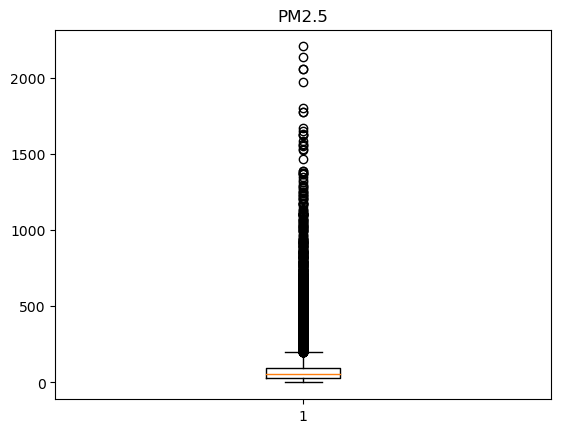

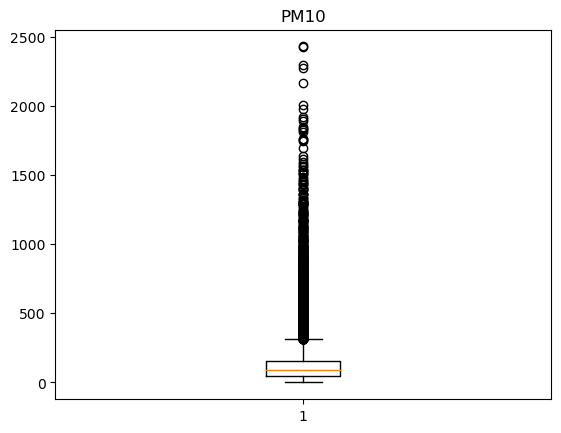

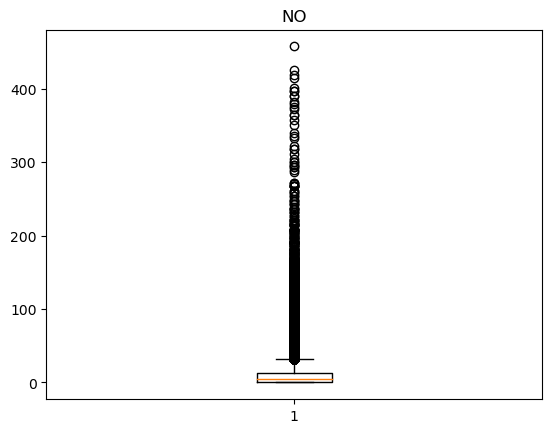

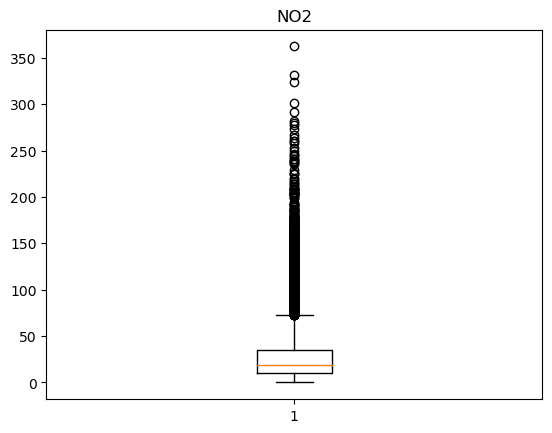

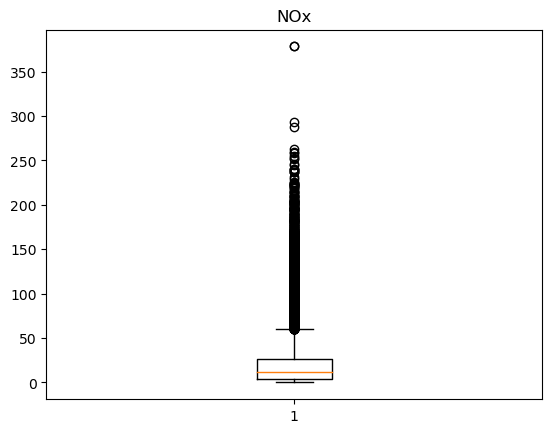

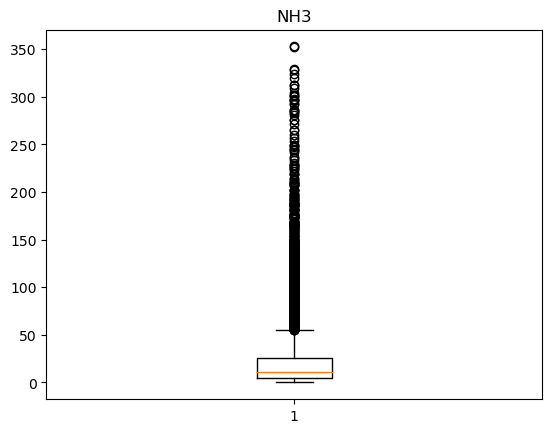

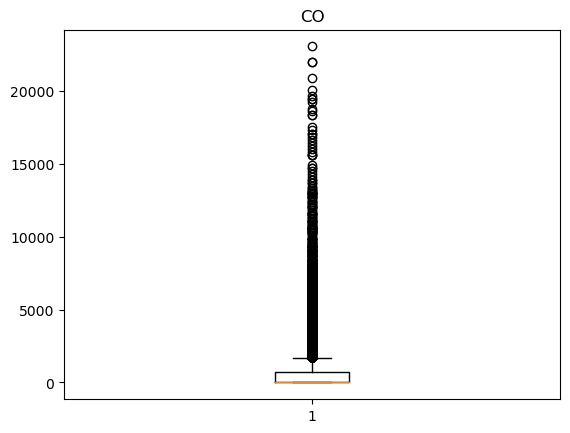

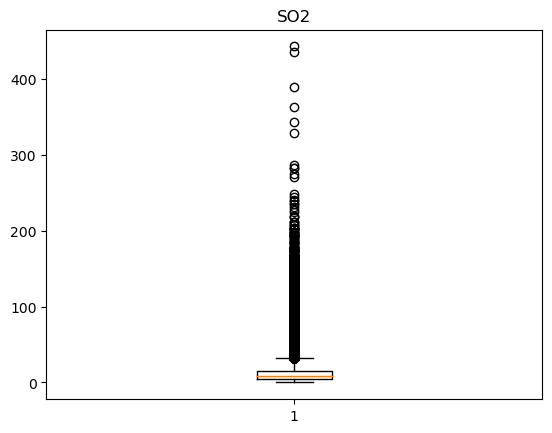

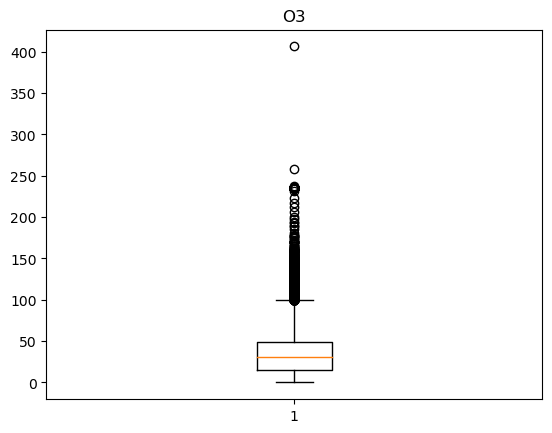

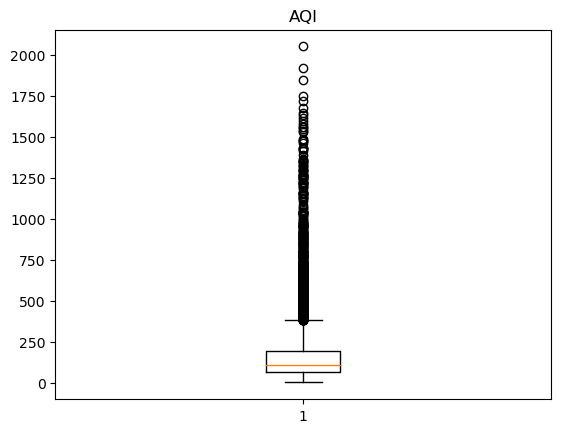

In [15]:
col = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
            'AQI']
for i in col:
    plt.figure()
    plt.boxplot(data[i])
    plt.title(i)

### Flooring & Capping 

In [16]:
data.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [17]:
# Outlier handling in PM2.5 
Q1_PM2_5=data['PM2.5'].quantile(0.25)
Q3_PM2_5=data['PM2.5'].quantile(0.75)
IQR_PM2_5=Q3_PM2_5-Q1_PM2_5
upper_PM2_5=Q3_PM2_5+(1.5*IQR_PM2_5)
lower_PM2_5=Q1_PM2_5-(1.5*IQR_PM2_5)
data['PM2.5']=np.where(data['PM2.5']>upper_PM2_5,upper_PM2_5,np.where(data['PM2.5']<lower_PM2_5,lower_PM2_5,data['PM2.5']))

In [18]:
# Outlier handling in PM10 
Q1_PM10=data['PM10'].quantile(0.25)
Q3_PM10=data['PM10'].quantile(0.75)
IQR_PM10=Q3_PM10-Q1_PM10
upper_PM10=Q3_PM10+(1.5*IQR_PM10)
lower_PM10=Q1_PM10-(1.5*IQR_PM10)
data['PM10']=np.where(data['PM10']>upper_PM10,upper_PM10,np.where(data['PM10']<lower_PM10,lower_PM10,data['PM10']))


In [19]:
# Outlier handling in NO 
Q1_NO=data['NO'].quantile(0.25)
Q3_NO=data['NO'].quantile(0.75)
IQR_NO=Q3_NO-Q1_NO
upper_NO=Q3_NO+(1.5*IQR_NO)
lower_NO=Q1_NO-(1.5*IQR_NO)
data['NO']=np.where(data['NO']>upper_NO,upper_NO,np.where(data['NO']<lower_NO,lower_NO,data['NO']))

In [20]:
# Outlier handling in NO2 
Q1_NO2=data['NO2'].quantile(0.25)
Q3_NO2=data['NO2'].quantile(0.75)
IQR_NO2=Q3_NO2-Q1_NO2
upper_NO2=Q3_NO2+(1.5*IQR_NO2)
lower_NO2=Q1_NO2-(1.5*IQR_NO2)
data['NO2']=np.where(data['NO2']>upper_NO2,upper_NO2,np.where(data['NO2']<lower_NO2,lower_NO2,data['NO2']))


In [21]:
# Outlier handling in NOx 
Q1_NOx=data['NOx'].quantile(0.25)
Q3_NOx=data['NOx'].quantile(0.75)
IQR_NOx=Q3_NOx-Q1_NOx
upper_NOx=Q3_NOx+(1.5*IQR_NOx)
lower_NOx=Q1_NOx-(1.5*IQR_NOx)
data['NOx']=np.where(data['NOx']>upper_NOx,upper_NOx,np.where(data['NOx']<lower_NOx,lower_NOx,data['NOx']))

In [22]:
# Outlier handling in NH3 
Q1_NH3=data['NH3'].quantile(0.25)
Q3_NH3=data['NH3'].quantile(0.75)
IQR_NH3=Q3_NH3-Q1_NH3
upper_NH3=Q3_NH3+(1.5*IQR_NH3)
lower_NH3=Q1_NH3-(1.5*IQR_NH3)
data['NH3']=np.where(data['NH3']>upper_NH3,upper_NH3,np.where(data['NH3']<lower_NH3,lower_NH3,data['NH3']))

In [23]:
# Outlier handling in CO 
Q1_CO=data['CO'].quantile(0.25)
Q3_CO=data['CO'].quantile(0.75)
IQR_CO=Q3_CO-Q1_CO
upper_CO=Q3_CO+(1.5*IQR_CO)
lower_CO=Q1_CO-(1.5*IQR_CO)
data['CO']=np.where(data['CO']>upper_CO,upper_CO,np.where(data['CO']<lower_CO,lower_CO,data['CO']))

In [24]:
# Outlier handling in SO2
Q1_SO2=data['SO2'].quantile(0.25)
Q3_SO2=data['SO2'].quantile(0.75)
IQR_SO2=Q3_SO2-Q1_SO2
upper_SO2=Q3_SO2+(1.5*IQR_SO2)
lower_SO2=Q1_SO2-(1.5*IQR_SO2)
data['SO2']=np.where(data['SO2']>upper_SO2,upper_SO2,np.where(data['SO2']<lower_SO2,lower_SO2,data['SO2']))

In [25]:
# Outlier handling in O3
Q1_O3=data['O3'].quantile(0.25)
Q3_O3=data['O3'].quantile(0.75)
IQR_O3=Q3_O3-Q1_O3
upper_O3=Q3_O3+(1.5*IQR_O3)
lower_O3=Q1_O3-(1.5*IQR_O3)
data['O3']=np.where(data['O3']>upper_O3,upper_O3,np.where(data['O3']<lower_O3,lower_O3,data['O3']))

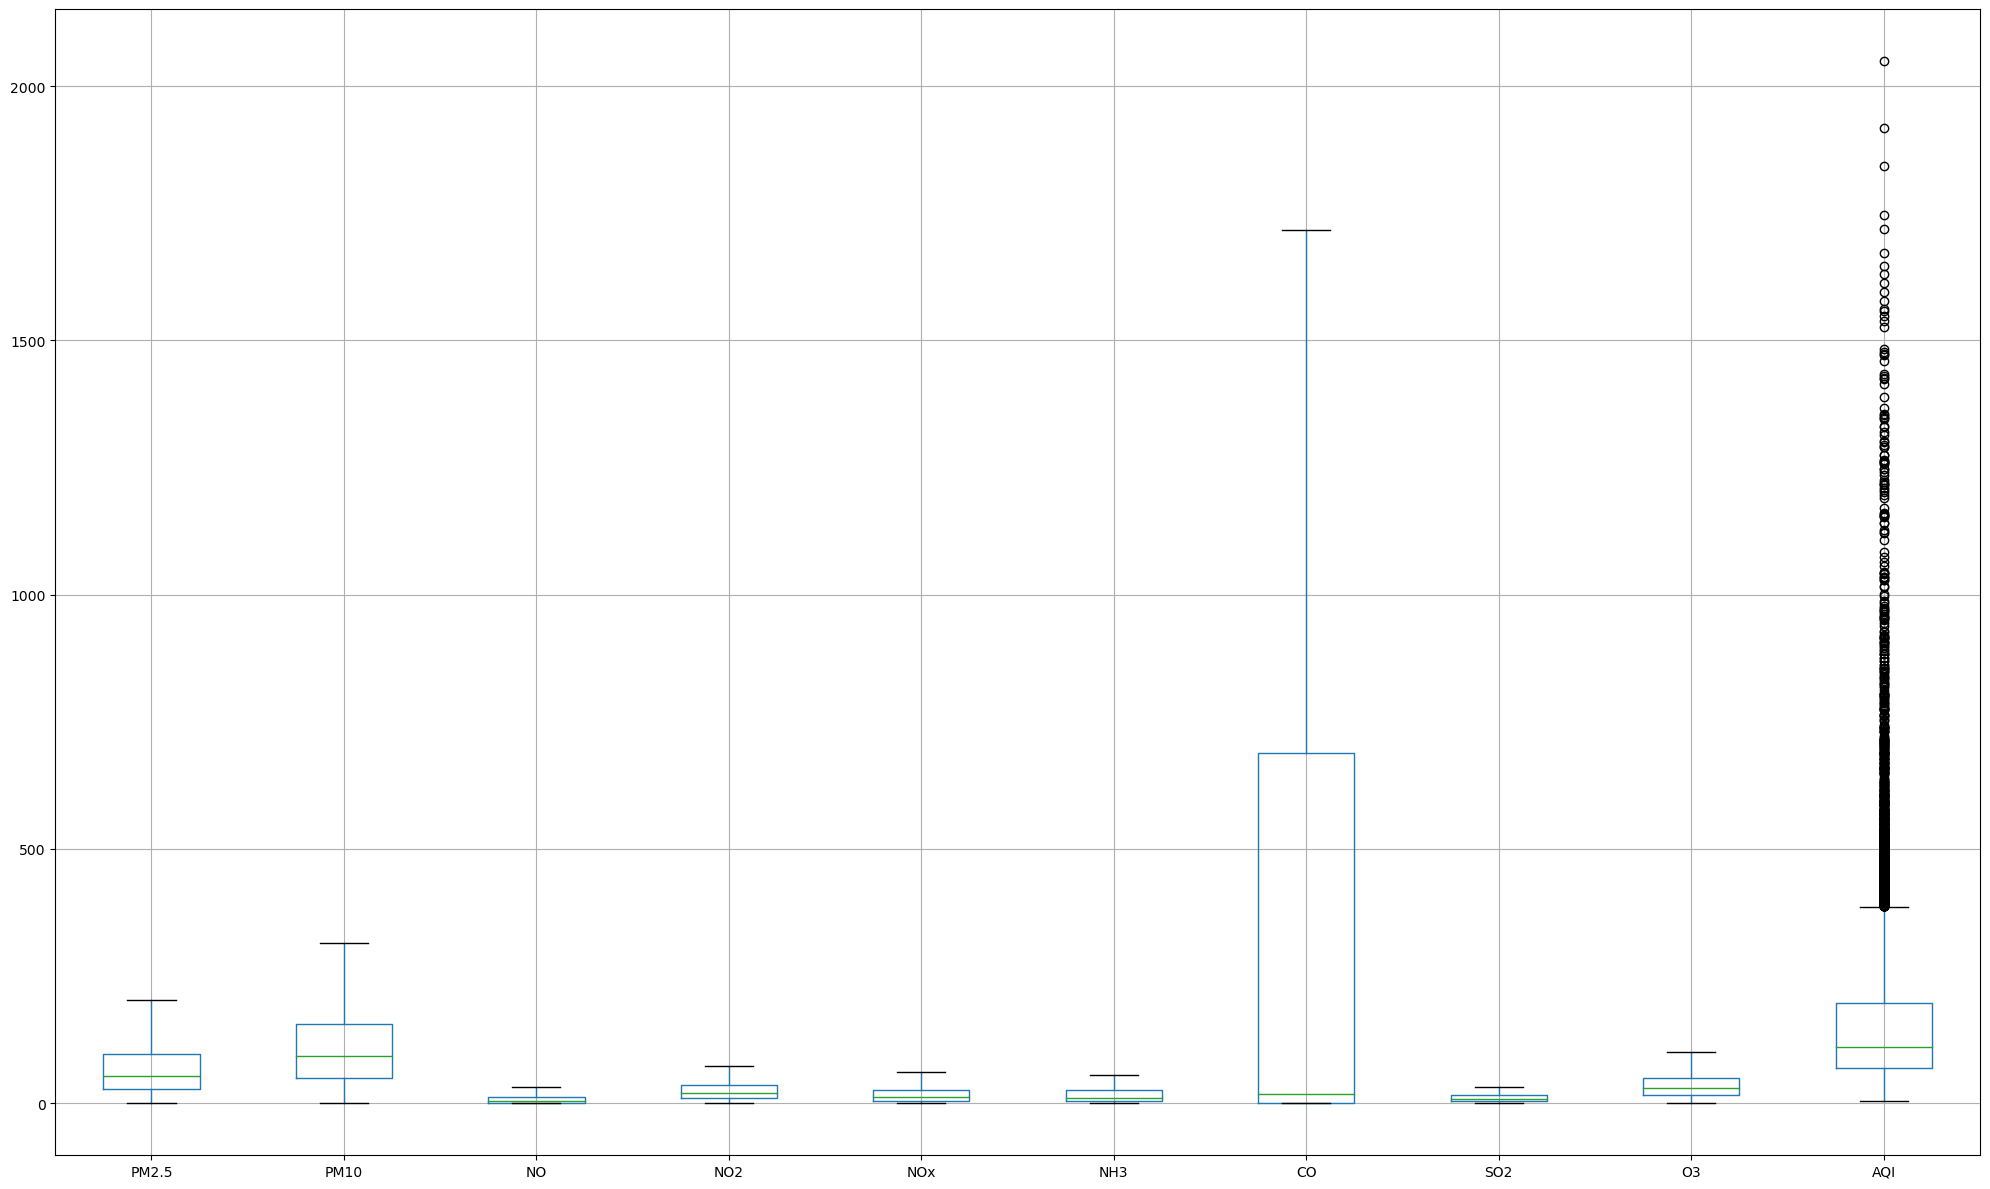

In [26]:
# Create box plots to identify outliers
data.boxplot(figsize=(20, 12))
plt.tight_layout()
plt.show()#it provide knowledge and understanding of the data also understanding the error in data as outliers

In [27]:
data.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,AQI
count,48354.000000,48354.000000,48354.000000,48354.000000,48354.000000,48354.000000,48354.000000,48354.000000,48354.000000,48354.000000
mean,71.629578,113.166492,8.479691,25.324721,18.384114,17.252921,414.879066,11.868925,34.741654,143.045951
std,58.665939,84.697850,10.538521,19.663684,17.773380,16.088695,546.885220,9.285032,25.845473,116.676373
min,0.040000,0.030000,0.000000,0.010000,0.000000,0.000000,0.000000,0.010000,0.000000,3.883333
25%,27.332500,48.550000,0.000000,10.280000,4.358512,5.000000,0.910000,5.070000,15.510000,69.000000
50%,52.590000,93.000000,4.225000,19.110000,12.020488,11.020000,17.225000,8.690000,30.265000,111.000000
75%,97.460000,155.340000,12.740000,35.420000,26.790000,25.240000,687.600000,15.740000,49.350000,196.108333
max,202.651250,315.525000,31.850000,73.130000,60.437231,55.600000,1717.635000,31.745000,100.110000,2049.000000


In [28]:
print('skewness value of PM2.5: ',data['PM2.5'].skew())
print('skewness value of PM10: ',data['PM10'].skew())
print('skewness value of NO: ',data['NO'].skew())
print('skewness value of NO2: ',data['NO2'].skew())
print('skewness value of NOx: ',data['NOx'].skew())
print('skewness value of NH3: ',data['NH3'].skew())
print('skewness value of CO: ',data['CO'].skew())
print('skewness value of SO2: ',data['SO2'].skew())
print('skewness value of O3: ',data['O3'].skew())
print('skewness value of AQI: ',data['AQI'].skew())

skewness value of PM2.5:  1.0605758388239332
skewness value of PM10:  0.9775363826929925
skewness value of NO:  1.177628958611126
skewness value of NO2:  1.0418057376939396
skewness value of NOx:  1.1466406057844847
skewness value of NH3:  1.0759292113304622
skewness value of CO:  1.2097133864608378
skewness value of SO2:  1.0649726006478204
skewness value of O3:  0.7695852919672185
skewness value of AQI:  3.4429578171004516


In [29]:
data = data.drop(['City','Date'],axis=1)

In [30]:
data.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,AQI,AQI_Bucket
28,83.13,141.54,6.93,28.71,33.720000,8.36,6.93,31.745,59.76,209.0,Poor
29,79.84,141.54,13.85,28.68,41.080000,8.36,13.85,31.745,97.07,328.0,Very Poor
30,94.52,141.54,24.39,32.66,52.610000,8.36,24.39,31.745,100.11,514.0,Severe
31,135.99,141.54,31.85,42.08,60.437231,8.36,43.48,31.745,100.11,782.0,Severe
32,178.33,141.54,31.85,35.31,60.437231,8.36,54.56,31.745,100.11,914.0,Severe


In [31]:
data.isna().sum()

PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
AQI           0
AQI_Bucket    0
dtype: int64

# Label Encoding

In [32]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['AQI_Bucket'] = le.fit_transform(data['AQI_Bucket'])

In [33]:
data['AQI_Bucket'].unique()

array([2, 5, 4, 1, 3, 0])

In [34]:
encoded_values = dict(zip(le.classes_, le.transform(le.classes_)))
print(encoded_values)

{'Good': 0, 'Moderate': 1, 'Poor': 2, 'Satisfactory': 3, 'Severe': 4, 'Very Poor': 5}


In [35]:
data.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,AQI,AQI_Bucket
28,83.13,141.54,6.93,28.71,33.720000,8.36,6.93,31.745,59.76,209.0,2
29,79.84,141.54,13.85,28.68,41.080000,8.36,13.85,31.745,97.07,328.0,5
30,94.52,141.54,24.39,32.66,52.610000,8.36,24.39,31.745,100.11,514.0,4
31,135.99,141.54,31.85,42.08,60.437231,8.36,43.48,31.745,100.11,782.0,4
32,178.33,141.54,31.85,35.31,60.437231,8.36,54.56,31.745,100.11,914.0,4


In [36]:
data.tail()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,AQI,AQI_Bucket
53030,37.53,47.09,0.0,2.08,0.669056,0.08,353.81,4.11,100.11,100.102941,1
53031,32.17,43.44,0.0,3.77,1.212664,1.74,380.52,5.07,82.97,82.970000,3
53032,36.01,48.06,0.0,4.28,1.376711,1.20,390.53,5.19,80.11,80.110000,3
53033,30.17,48.89,0.0,1.36,0.437460,0.00,300.41,2.21,95.84,95.840000,3
53034,52.36,61.41,0.0,6.00,1.929969,0.20,427.25,10.73,88.69,88.690000,3


# Min max scaling

In [37]:
X = data.drop(['AQI','AQI_Bucket'],axis=1)

In [38]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
X = min_max.fit_transform(X)

In [39]:
X = pd.DataFrame(X,columns=['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3'])

In [40]:
X.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3
0,0.410096,0.448533,0.217582,0.392505,0.557934,0.15036,0.004035,1.0,0.596943
1,0.393858,0.448533,0.434851,0.392095,0.679713,0.15036,0.008063,1.0,0.969633
2,0.466312,0.448533,0.765777,0.446526,0.870490,0.15036,0.014200,1.0,1.000000
3,0.670989,0.448533,1.000000,0.575356,1.000000,0.15036,0.025314,1.0,1.000000
4,0.879961,0.448533,1.000000,0.482768,1.000000,0.15036,0.031765,1.0,1.000000


In [41]:
X.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3
count,48354.000000,48354.000000,48354.000000,48354.000000,48354.000000,48354.000000,48354.000000,48354.000000,48354.000000
mean,0.353335,0.358600,0.266238,0.346208,0.304185,0.310304,0.241541,0.373686,0.347035
std,0.289549,0.268460,0.330880,0.268923,0.294080,0.289365,0.318394,0.292580,0.258171
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.134704,0.153790,0.000000,0.140454,0.072116,0.089928,0.000530,0.159445,0.154930
50%,0.259364,0.294680,0.132653,0.261214,0.198892,0.198201,0.010028,0.273515,0.302317
75%,0.480822,0.492274,0.400000,0.484272,0.443270,0.453957,0.400318,0.495667,0.492958
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Model creation

## Splitting the dataset into Dependent and Independent features

In [42]:
x = data.drop(['AQI','AQI_Bucket'],axis=1)
y = data['AQI']

In [43]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=70)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(38683, 9) (9671, 9) (38683,) (9671,)


## Decision Tree Regressor

In [44]:
from sklearn.tree import DecisionTreeRegressor
dt_clf = DecisionTreeRegressor()
model_dtr = dt_clf.fit(x_train,y_train)
y_pred_dtr = model_dtr.predict(x_test)

#checking the accuracy of the model
from sklearn.metrics import mean_squared_error,r2_score
print(mean_squared_error(y_test,y_pred_dtr))
print(r2_score(y_test,y_pred_dtr))

2299.7967555291275
0.8320127104969929


In [45]:
model_dtr.predict([[83.13,141.54,6.93,28.71,33.72,8.36,6.93,31.745,100.11]])

array([330.])

In [46]:
model_dtr.predict([[79.84,141.54,13.85,28.68,41.08,8.36,13.85,31.745,97.07]])

array([328.])

In [47]:
model_dtr.predict([[94.52,141.54,24.39,32.66,52.61,8.36,24.39,31.745,111.33]])

array([589.])

In [48]:
model_dtr.predict([[135.99,141.54,31.85,42.08,60.437231,8.36,43.48,31.745,100.11]])

array([782.])

<Axes: xlabel='AQI', ylabel='Density'>

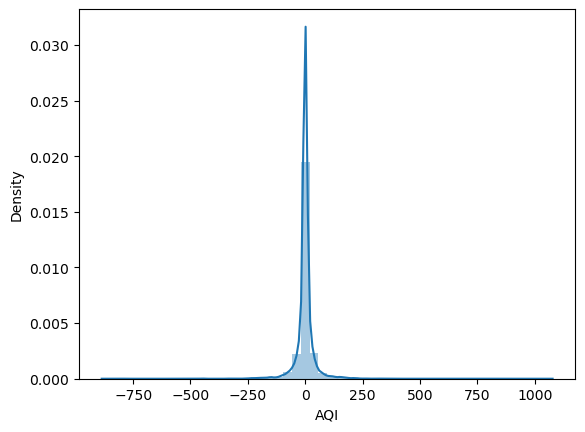

In [49]:
# checking difference between labled y and predicted y
sns.distplot(y_test-y_pred_dtr)

In [50]:
import pickle
pickle.dump(model_dtr,open('model.pkl','wb') )

## Random Forest Regressor 

In [51]:
from sklearn.ensemble import RandomForestRegressor
rf_clf = RandomForestRegressor()
model_rf = rf_clf.fit(x_train,y_train)

#checking the accuracy of the model
y_pred_rf = model_rf.predict(x_test)
print(mean_squared_error(y_test,y_pred_rf))
print(r2_score(y_test,y_pred_rf))

1186.80894727348
0.9133102445983236


In [52]:
model_rf.predict([[83.13,141.54,6.93,28.71,33.72,8.36,6.93,31.745,100.11]])

array([260.])

In [53]:
model_rf.predict([[79.84,141.54,13.85,28.68,41.08,8.36,13.85,31.745,97.07]])

array([343.75])

In [54]:
model_rf.predict([[94.52,141.54,24.39,32.66,52.61,8.36,24.39,31.745,111.33]])

array([519.3])

In [55]:
model_rf.predict([[135.99,141.54,31.85,42.08,60.437231,8.36,43.48,31.745,100.11]])

array([764.28])

In [56]:
model_rf.predict([[52.36,61.41,0.0,6.00,1.929969,0.20,427.25,10.73,88.69]])

array([88.58266667])

In [57]:
import pickle
pickle.dump(model_dtr,open('model_dt.pkl','wb') )

In [58]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=70)
model_rf1 = rf_clf.fit(X_train,y_train)
y_pred_rf1 = model_rf1.predict(X_test)

#checking the accuracy of the model
print(mean_squared_error(y_test,y_pred_rf1))
print(r2_score(y_test,y_pred_rf1))

1190.0991178903157
0.9130699160377254


In [59]:
model_rf1.predict([[83.13,141.54,6.93,28.71,33.72,8.36,6.93,31.745,100.11]])

array([177.4965314])

In [60]:
model_rf1.predict([[79.84,141.54,13.85,28.68,41.08,8.36,13.85,31.745,97.07]])

array([177.4965314])

## Linear Regression Model

In [67]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model = lr.fit(x_train,y_train)
y_pred = model.predict(x_test)

#checking the accuracy of the model
print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

5637.672530192967
0.5881995549494625


## Lasso Regression model 

In [68]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 0.01)
lasso_model = lasso.fit(x_train,y_train)
y_pred1 = lasso_model.predict(x_test)

#checking the accuracy of the model
print(mean_squared_error(y_test,y_pred1))
print(r2_score(y_test,y_pred1))

5637.670107483917
0.5881997319148078


## Support Vector Regressor

In [69]:
from sklearn.svm import SVR
svmclf = SVR(kernel='rbf')
model_svr = svmclf.fit(x_train,y_train)

In [70]:
y_pred_svr = model_svr.predict(x_test)
print(mean_squared_error(y_test,y_pred_svr))
print(r2_score(y_test,y_pred_svr))

6157.306160909534
0.5502432247003581
